<a href="https://colab.research.google.com/github/RealMyeong/Aiffel_DataThon/blob/main/personal/DataThon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [391]:
#필요한 모듈 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [392]:
data_path = '/content/drive/MyDrive/DataThon/'

data = pd.read_csv(data_path+'Stores.csv')

In [393]:
data.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


## 데이터 종류

  - Store ID : (index) 매장 번호
  - Store Area : 매장 크기
  - Items_Available : 판매가능한 품목 수  
  - Daily_Customer_Count : 월 별 일일 평균 방문자 수
  - Store_Sales : 매출

결측치 확인

In [394]:
data.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

결측치 없는것을 볼 수 있음

In [395]:
data.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


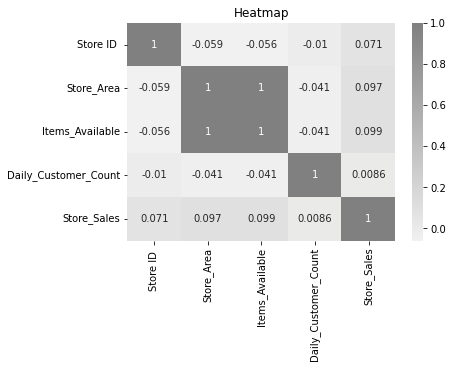

In [396]:
sns.heatmap(data.corr(), cmap=sns.light_palette(
    "gray", as_cmap=True), annot=True)
plt.title("Heatmap")
plt.show()

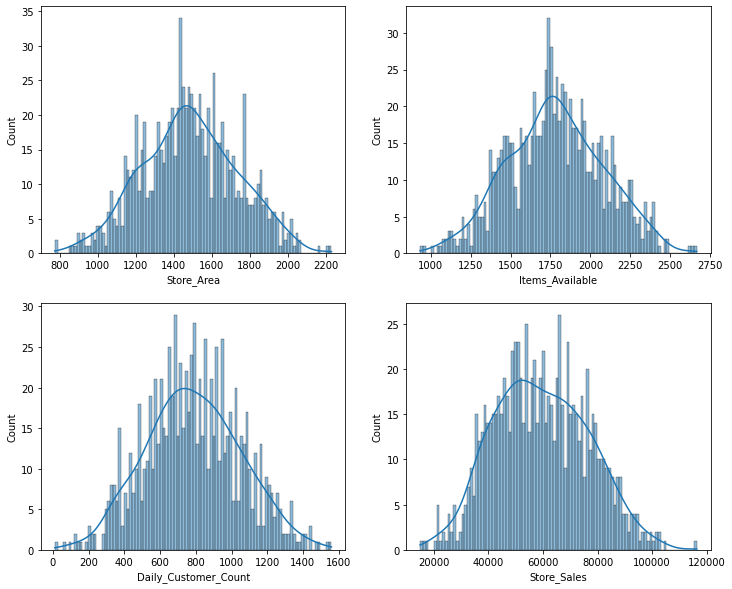

In [397]:
f, ax = plt.subplots(2, 2, figsize=(12,10))
sns.histplot(data['Store_Area'], kde=True,  bins=100, ax=ax[0,0])
sns.histplot(data['Items_Available'], kde=True, bins=100, ax=ax[0,1])
sns.histplot(data['Daily_Customer_Count'], kde=True, bins=100, ax=ax[1,0])
sns.histplot(data['Store_Sales'], kde=True, bins=100, ax=ax[1,1])
plt.show()

정규분포와 비슷한 모양을 보이기 때문에 따로 왜도, 첨도에 대해서는 따로 게산할 필요가 없지 않을까..?

In [398]:
# 왜도

def skewness_self(inp):
    # 길이
    len_inp = len(inp)
    result = 0
    for i in inp:
        result += ((i - np.mean(inp)) / np.std(inp)) ** 3
    result = result / len_inp
    return result


# 첨도

def kurtosis_self(inp):
    # 길이
    len_inp = len(inp)
    result = 0
    for i in inp:
        result += ((i - np.mean(inp)) / np.std(inp)) ** 4
    result = (result / len_inp) - 3
    return result

In [399]:
columns = ['Store_Area', 'Store_Sales', 'Daily_Customer_Count', 'Items_Available']
skew = []
for col in columns:
  skew.append(skewness_self(data[col]))

In [400]:
skew

[0.03031600193763059,
 0.1485444304822789,
 0.07450778647414659,
 0.03438170966276822]

In [401]:
kurtosis = []
for col in columns:
  kurtosis.append(kurtosis_self(data[col]))

kurtosis

[-0.2876592278587049,
 -0.46026391920135223,
 -0.26499295536247436,
 -0.28621267587195254]

|왜도| < 3 , |첨도| <7 이므로 기준에 부합하는 데이터라고 볼 수 있다.

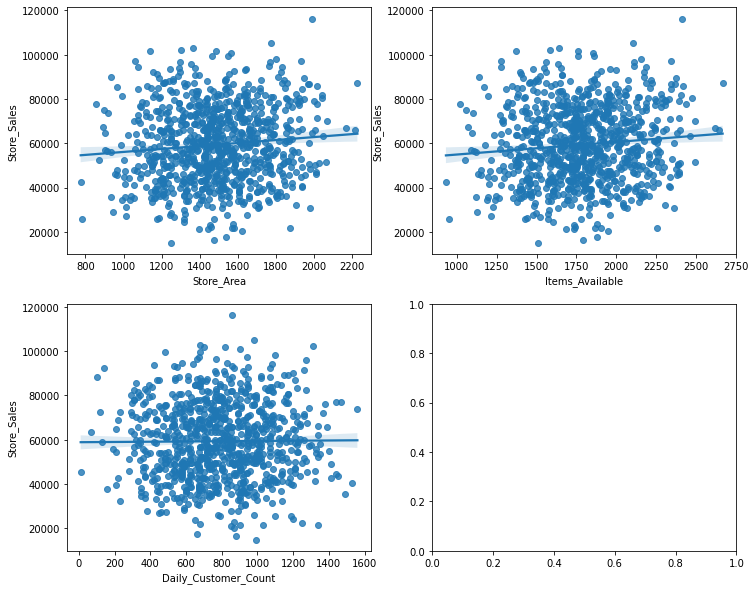

In [402]:
f, ax = plt.subplots(2,2,figsize=(12,10))
sns.regplot(x=data['Store_Area'], y=data['Store_Sales'], ax=ax[0,0])
sns.regplot(x=data['Items_Available'], y=data['Store_Sales'], ax=ax[0,1])
sns.regplot(x=data['Daily_Customer_Count'], y=data['Store_Sales'], ax=ax[1,0])
plt.show()

In [403]:
data['Area_level']=pd.qcut(data['Store_Area'],6)
data.groupby(['Area_level'])['Store_Sales'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Store_Sales
Area_level,
"(774.999, 1229.167]",56932.066667
"(1229.167, 1381.333]",59537.382550
"(1381.333, 1477.0]",58028.066667
"(1477.0, 1587.333]",59051.081081
"(1587.333, 1744.833]",60186.644295
"(1744.833, 2229.0]",62375.400000


In [404]:
data['Area_Class'] = 1
data.loc[data['Store_Area']<1229.167, 'Area_Class'] = 6
data.loc[(data['Store_Area']>=1229.167)&(data['Store_Area']<1381.333), 'Area_Class'] = 5
data.loc[(data['Store_Area']>=1381.333)&(data['Store_Area']<1477.0), 'Area_Class'] = 4
data.loc[(data['Store_Area']>=1477.0)&(data['Store_Area']<1587.333), 'Area_Class'] = 3
data.loc[(data['Store_Area']>=1587.333)&(data['Store_Area']<1744.833), 'Area_Class'] = 2
data.loc[(data['Store_Area']>=1744.833)&(data['Store_Area']<2229), 'Area_Class'] = 1

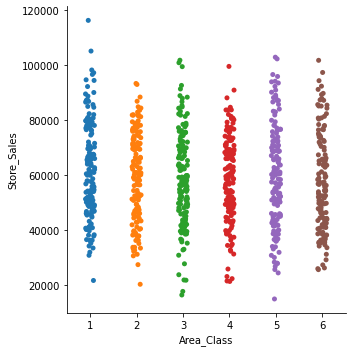

In [405]:
sns.catplot(x='Area_Class',y='Store_Sales',  data=data, kind='strip')

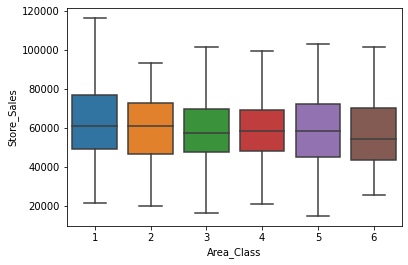

In [406]:
sns.boxplot(x='Area_Class', y='Store_Sales', data=data)

In [407]:
#단위 넓이 당 품목수

data['Items_per_Area'] = data['Items_Available']/data['Store_Area']

#단위 넓이 당 손님수

data['Customer_per_Area'] = data['Daily_Customer_Count']/data['Store_Area']

In [408]:
# 월 평균 이용 고객

data['Monthly_Customer_Count'] = data['Daily_Customer_Count'] * 30

# 1인 평균 사용 금액

data['Sales_per_Customer'] = data['Store_Sales'] / data['Monthly_Customer_Count']

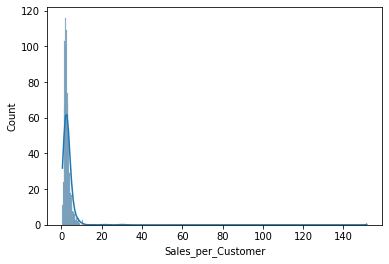

In [409]:
sns.histplot((data['Sales_per_Customer']), kde=True)

In [410]:
#log 처리
data['Sales_per_Customer']=np.log(data['Sales_per_Customer'])

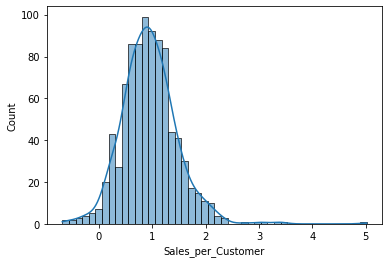

In [411]:
sns.histplot(data['Sales_per_Customer'], kde=True)

In [412]:
# 고객 1인당 구매 가능한 품목 개수
data['Items_per_Customers'] = data['Items_Available']/data['Daily_Customer_Count']

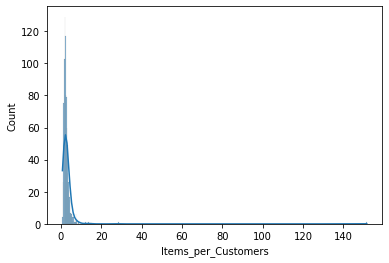

In [413]:
sns.histplot(data['Items_per_Customers'], kde=True)

In [414]:
# 로그 처리
data['Items_per_Customers'] = np.log(data['Items_per_Customers'])

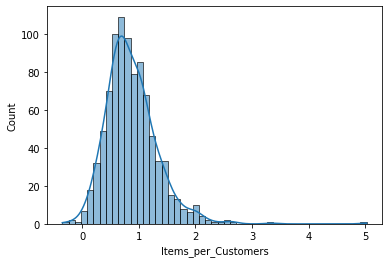

In [415]:
sns.histplot(data['Items_per_Customers'], kde=True)

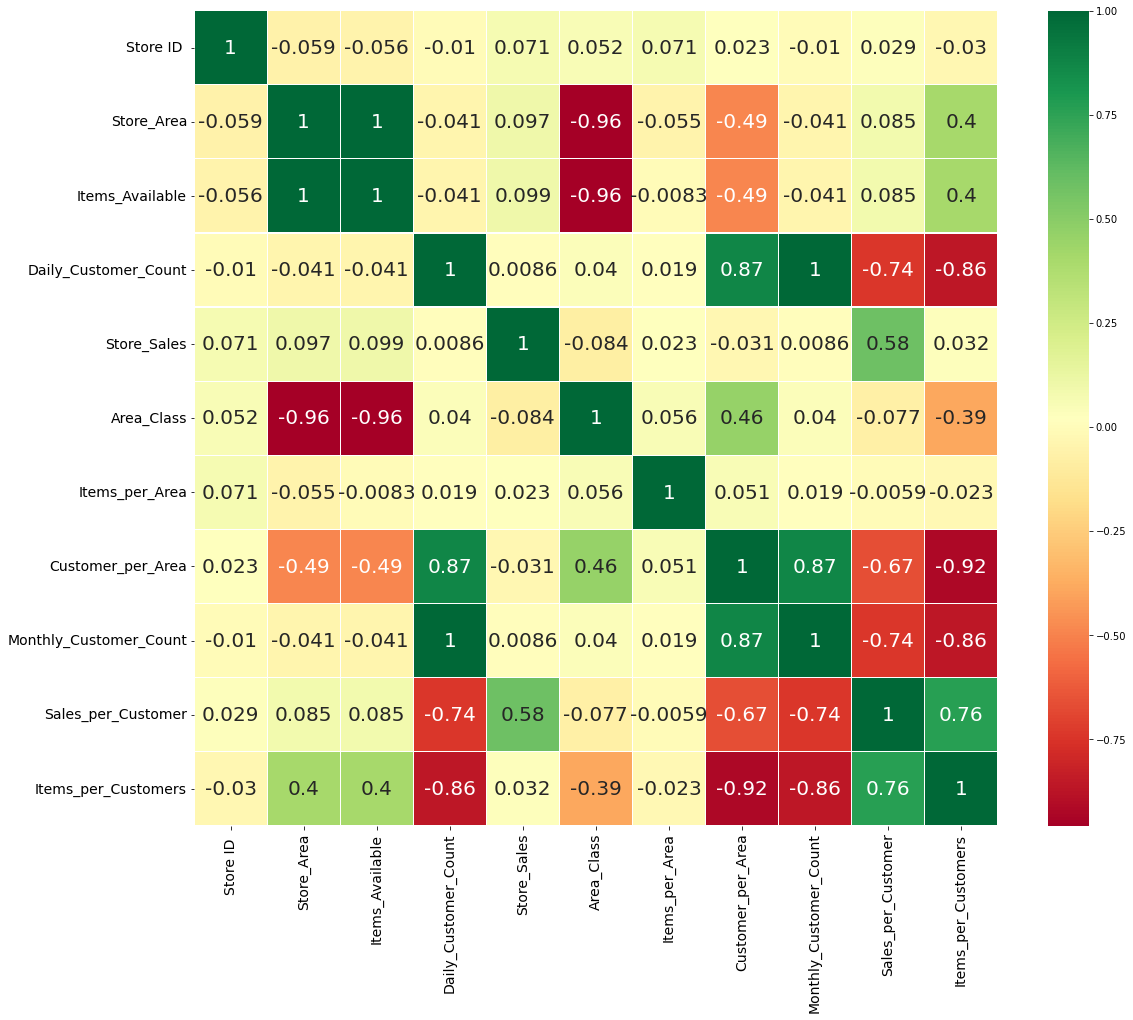

In [416]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

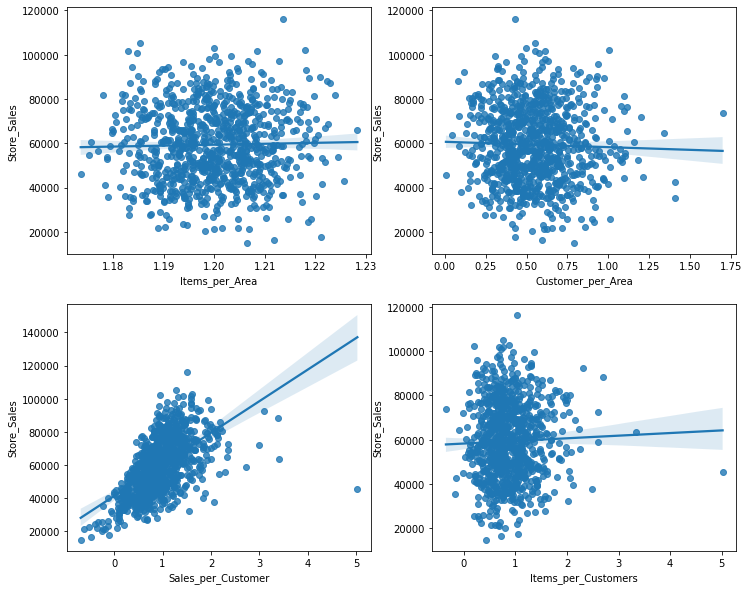

In [417]:
f, ax = plt.subplots(2,2,figsize=(12,10))
sns.regplot(x=data['Items_per_Area'], y=data['Store_Sales'], ax=ax[0,0])
sns.regplot(x=data['Customer_per_Area'], y=data['Store_Sales'], ax=ax[0,1])
sns.regplot(x=data['Sales_per_Customer'], y=data['Store_Sales'], ax=ax[1,0])
sns.regplot(x=data['Items_per_Customers'], y=data['Store_Sales'], ax=ax[1,1])
plt.show()

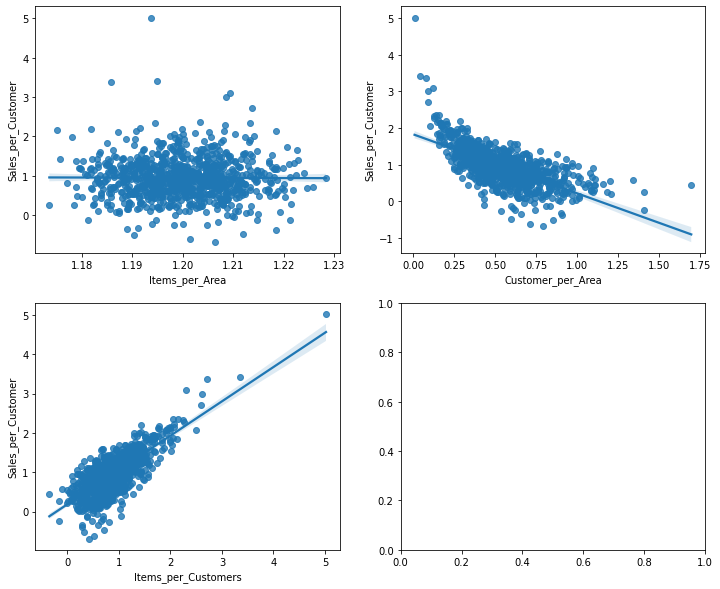

In [418]:
f, ax = plt.subplots(2,2,figsize=(12,10))
sns.regplot(x=data['Items_per_Area'], y=data['Sales_per_Customer'], ax=ax[0,0])
sns.regplot(x=data['Customer_per_Area'], y=data['Sales_per_Customer'], ax=ax[0,1])
sns.regplot(x=data['Items_per_Customers'], y=data['Sales_per_Customer'], ax=ax[1,0])
plt.show()

위 그래프에서 단위 면적당 이용자수가 적고, 이용자수 한 명당 구매 가능한 품목이 많으면 이용자 1명당 판매액이 늘어날 것 같다.

In [419]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Store ID                896 non-null    int64   
 1   Store_Area              896 non-null    int64   
 2   Items_Available         896 non-null    int64   
 3   Daily_Customer_Count    896 non-null    int64   
 4   Store_Sales             896 non-null    int64   
 5   Area_level              896 non-null    category
 6   Area_Class              896 non-null    int64   
 7   Items_per_Area          896 non-null    float64 
 8   Customer_per_Area       896 non-null    float64 
 9   Monthly_Customer_Count  896 non-null    int64   
 10  Sales_per_Customer      896 non-null    float64 
 11  Items_per_Customers     896 non-null    float64 
dtypes: category(1), float64(4), int64(7)
memory usage: 78.3 KB


In [420]:
data['Customer_Class']=pd.qcut(data['Sales_per_Customer'],5)
data.groupby(['Customer_Class'])['Store_Sales'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Store_Sales
Customer_Class,
"(-0.689, 0.551]",41748.333333
"(0.551, 0.809]",54159.441341
"(0.809, 1.039]",60703.016760
"(1.039, 1.304]",67501.061453
"(1.304, 5.021]",72743.016760


In [421]:
data['Rich_Customer'] = 1
data.loc[data['Sales_per_Customer']< 0.551, 'Rich_Customer'] = 5
data.loc[(data['Sales_per_Customer']>= 0.551)&(data['Sales_per_Customer']<0.809), 'Rich_Customer'] = 4
data.loc[(data['Sales_per_Customer']>=0.809)&(data['Sales_per_Customer']<1.039), 'Rich_Customer'] = 3
data.loc[(data['Sales_per_Customer']>=1.039)&(data['Sales_per_Customer']<1.304), 'Rich_Customer'] = 2
data.loc[(data['Sales_per_Customer']>=1.304)&(data['Sales_per_Customer']<5.021), 'Rich_Customer'] = 1

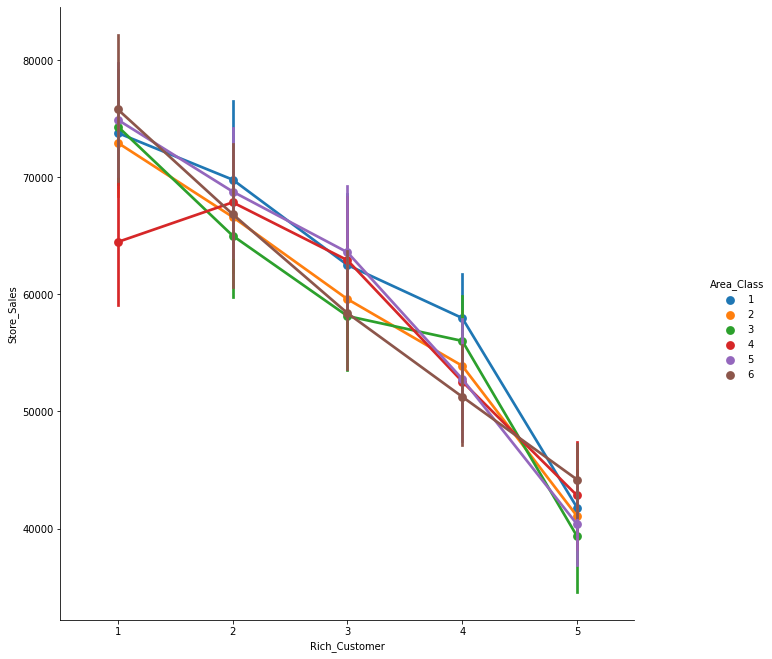

In [422]:

sns.catplot(x='Rich_Customer',y='Store_Sales',  data=data, hue='Area_Class',kind='point')
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.show()


In [423]:
#z-score 이상치 제거 
#rich_5
outlier = []
rich_5 = data['Store_Sales'][data['Rich_Customer']==5]
for i in rich_5:
  z = (i-np.mean(rich_5))/np.std(rich_5)
  if z > 3:
    outlier.append(i)

print(i)

54340


In [424]:
#rich_1
outlier = []
rich_1 = data['Store_Sales'][data['Rich_Customer']==1]
for i in rich_1:
  z = (i-np.mean(rich_1))/np.std(rich_1)
  if z > 3:
    outlier.append(i)

print(i)

96610


In [425]:
data.loc[data['Store_Sales']==54340, 'Store_Sales'] = rich_5.mean()
data.loc[data['Store_Sales']==96610, 'Store_Sales'] = rich_1.mean()

IQR 이상치 제거

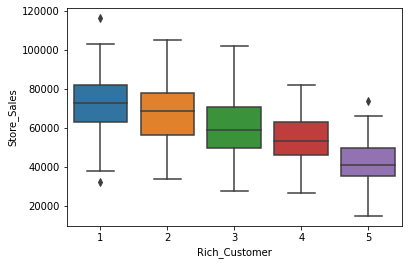

In [426]:
sns.boxplot(x='Rich_Customer',y='Store_Sales', data=data)

In [427]:
data_rich_5 = data['Store_Sales'][data['Rich_Customer']==5]
data_rich_1 = data['Store_Sales'][data['Rich_Customer']==1]

In [428]:
# Rich_Customer 5에 대한 IQR 이상치 확인
q25, q75 = np.percentile(data_rich_5, 25), np.percentile(data_rich_5, 75)
iqr = q75 - q25
cut_off = 1.5 * iqr
lower, upper = q25 - cut_off, q75 + cut_off

In [429]:
data['Rich_5_upper']=(data['Store_Sales'][data['Rich_Customer']==5] > upper)

In [430]:
data['Rich_5_lower']= data['Store_Sales'][data['Rich_Customer']==5] < lower

In [431]:
# Rich_Customer 1에 대한 IQR 이상치 확인
q25, q75 = np.percentile(data_rich_1, 25), np.percentile(data_rich_1, 75)
iqr = q75 - q25
cut_off = 1.5 * iqr
lower, upper = q25 - cut_off, q75 + cut_off

In [432]:
data['Rich_1_lower']=(data['Store_Sales'][data['Rich_Customer']==1] < lower)
data['Rich_1_upper']=data['Store_Sales'][data['Rich_Customer']==1] > upper

In [433]:
# True인 값이 있는 인덱스 출력

print(data[data['Rich_5_upper']==True].index)
print(data[data['Rich_5_lower']==True].index)
print(data[data['Rich_1_upper']==True].index)
print(data[data['Rich_1_lower']==True].index)

Int64Index([848], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([649], dtype='int64')
Int64Index([185], dtype='int64')


In [434]:
# 인덱스 벌호로 이상치를 평균으로 바꿔줌

data.iloc[848, 4] = data_rich_5.mean()
data.iloc[649, 4] = data_rich_1.mean()
data.iloc[185, 4] = data_rich_1.mean()

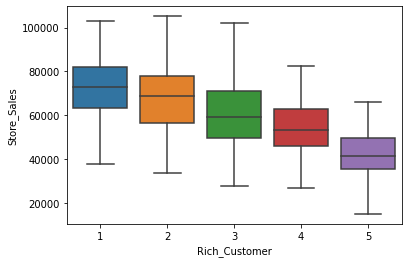

In [435]:
sns.boxplot(x='Rich_Customer',y='Store_Sales', data=data)

In [436]:
data.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Area_level,Area_Class,Items_per_Area,Customer_per_Area,Monthly_Customer_Count,Sales_per_Customer,Items_per_Customers,Customer_Class,Rich_Customer,Rich_5_upper,Rich_5_lower,Rich_1_lower,Rich_1_upper
0,1,1659,1961,530,66490.0,"(1587.333, 1744.833]",2,1.182037,0.319470,15900,1.430732,1.308333,"(1.304, 5.021]",1,NaN,NaN,False,False
1,2,1461,1752,210,39820.0,"(1381.333, 1477.0]",4,1.199179,0.143737,6300,1.843820,2.121406,"(1.304, 5.021]",1,NaN,NaN,False,False
2,3,1340,1609,720,54010.0,"(1229.167, 1381.333]",5,1.200746,0.537313,21600,0.916476,0.804117,"(0.809, 1.039]",3,NaN,NaN,NaN,NaN
3,4,1451,1748,620,53730.0,"(1381.333, 1477.0]",4,1.204686,0.427292,18600,1.060810,1.036508,"(1.039, 1.304]",2,NaN,NaN,NaN,NaN
4,5,1770,2111,450,46620.0,"(1744.833, 2229.0]",1,1.192655,0.254237,13500,1.239340,1.545669,"(1.039, 1.304]",2,NaN,NaN,NaN,NaN


In [437]:
#vif 이용해 다중공선성 확인
from patsy import dmatrices
import pandas.util.testing as tm
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('Store_Sales ~ Rich_Customer + Items_per_Customers + Sales_per_Customer + Items_per_Area', data, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,16346.165137,Intercept
1,4.849503,Rich_Customer
2,2.450441,Items_per_Customers
3,6.895868,Sales_per_Customer
4,1.001087,Items_per_Area


vif < 10 이라서 items_per_customers, sales_per_customer, items_per_area는 다중공선성이 없다고 판단 된다.

- 허수 이용고객 잡기

In [438]:
data['unit_thousand'] = 0

for i in range(896):
  data['unit_thousand'][i] = round(data['Store_Sales'][i], -3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [439]:
count={}

for i in data['unit_thousand']:
  try : count[i] += 1
  except : count[i] = 1

print(count)

{66000: 28, 40000: 15, 54000: 24, 47000: 17, 45000: 14, 72000: 14, 38000: 11, 46000: 18, 44000: 15, 71000: 17, 58000: 15, 60000: 21, 59000: 18, 79000: 11, 77000: 15, 64000: 17, 43000: 19, 69000: 18, 53000: 12, 51000: 25, 42000: 16, 70000: 18, 26000: 5, 61000: 16, 78000: 16, 85000: 9, 80000: 10, 15000: 1, 75000: 10, 63000: 12, 55000: 13, 50000: 24, 48000: 12, 68000: 11, 36000: 16, 49000: 22, 67000: 14, 76000: 17, 82000: 13, 84000: 9, 73000: 13, 33000: 8, 57000: 20, 34000: 9, 27000: 3, 39000: 18, 41000: 12, 89000: 4, 90000: 4, 97000: 3, 65000: 16, 56000: 19, 94000: 5, 24000: 2, 52000: 18, 81000: 11, 31000: 7, 62000: 16, 37000: 9, 100000: 1, 74000: 16, 92000: 3, 91000: 4, 83000: 5, 22000: 4, 35000: 8, 32000: 3, 87000: 12, 21000: 2, 86000: 3, 23000: 1, 28000: 4, 102000: 3, 103000: 1, 88000: 7, 20000: 1, 29000: 1, 95000: 1, 99000: 1, 93000: 3, 30000: 1, 18000: 1, 96000: 1, 16000: 1, 101000: 1, 105000: 1, 98000: 1}


In [440]:
data['Daily_Sales'] = data['Store_Sales']/30

In [441]:
index_66000 = (data['Daily_Customer_Count'][data['unit_thousand']==66000].index)

In [442]:
df2 = np.exp(data.loc[index_66000,'Sales_per_Customer'])
df3 = data.loc[index_66000,'Rich_Customer']
df4 = data.loc[index_66000, 'Daily_Sales']

In [443]:
np.array(df2)
np.array(df3)
np.array(df4)

array([2216.33333333, 2212.        , 2207.        , 2197.33333333,
       2185.33333333, 2188.66666667, 2186.        , 2200.        ,
       2209.        , 2201.        , 2196.33333333, 2205.66666667,
       2183.33333333, 2200.66666667, 2201.66666667, 2201.66666667,
       2191.66666667, 2194.        , 2196.66666667, 2202.33333333,
       2205.33333333, 2210.        , 2188.66666667, 2196.33333333,
       2200.        , 2213.        , 2199.        , 2213.        ])

In [444]:
df = pd.DataFrame(data['Daily_Customer_Count'][data['unit_thousand']==66000])
df['sale_per_cus'] = df2
df['class'] = df3
df['real_sales'] = df4

In [445]:
df.head(10)

,Daily_Customer_Count,sale_per_cus,class,real_sales
0,530,4.181761,1,2216.333333
14,770,2.872727,2,2212.000000
56,1240,1.779839,4,2207.000000
63,860,2.555039,3,2197.333333
77,1390,1.572182,5,2185.333333
79,600,3.647778,2,2188.666667
101,760,2.876316,2,2186.000000
120,890,2.471910,3,2200.000000
216,840,2.629762,3,2209.000000
239,920,2.392391,3,2201.000000


- 필요없는 컬럼들 drop

In [446]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Store ID                896 non-null    int64   
 1   Store_Area              896 non-null    int64   
 2   Items_Available         896 non-null    int64   
 3   Daily_Customer_Count    896 non-null    int64   
 4   Store_Sales             896 non-null    float64 
 5   Area_level              896 non-null    category
 6   Area_Class              896 non-null    int64   
 7   Items_per_Area          896 non-null    float64 
 8   Customer_per_Area       896 non-null    float64 
 9   Monthly_Customer_Count  896 non-null    int64   
 10  Sales_per_Customer      896 non-null    float64 
 11  Items_per_Customers     896 non-null    float64 
 12  Customer_Class          896 non-null    category
 13  Rich_Customer           896 non-null    int64   
 14  Rich_5_upper            17

In [447]:
columns = [ 'Area_level', 'Customer_Class', 'Rich_5_upper', 'Rich_5_lower', 'Rich_1_upper', 'Rich_1_lower', 'unit_thousand', 'Daily_Sales']
len(columns)

8

In [448]:
data = data.drop( columns, axis=1)

In [449]:
data = data.drop('Store ID ', axis=1)

In [450]:
data.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Area_Class,Items_per_Area,Customer_per_Area,Monthly_Customer_Count,Sales_per_Customer,Items_per_Customers,Rich_Customer
0,1659,1961,530,66490.0,2,1.182037,0.319470,15900,1.430732,1.308333,1
1,1461,1752,210,39820.0,4,1.199179,0.143737,6300,1.843820,2.121406,1
2,1340,1609,720,54010.0,5,1.200746,0.537313,21600,0.916476,0.804117,3
3,1451,1748,620,53730.0,4,1.204686,0.427292,18600,1.060810,1.036508,2
4,1770,2111,450,46620.0,1,1.192655,0.254237,13500,1.239340,1.545669,2


- Area_Class, Rich_Customer One-hot-encoding

In [451]:
data = pd.get_dummies(data, columns=['Area_Class'], prefix = 'Area_Class')
data = pd.get_dummies(data, columns=['Rich_Customer'], prefix = 'Rich_Customer')

In [452]:
data.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Items_per_Area,Customer_per_Area,Monthly_Customer_Count,Sales_per_Customer,Items_per_Customers,Area_Class_1,Area_Class_2,Area_Class_3,Area_Class_4,Area_Class_5,Area_Class_6,Rich_Customer_1,Rich_Customer_2,Rich_Customer_3,Rich_Customer_4,Rich_Customer_5
0,1659,1961,530,66490.0,1.182037,0.319470,15900,1.430732,1.308333,0,1,0,0,0,0,1,0,0,0,0
1,1461,1752,210,39820.0,1.199179,0.143737,6300,1.843820,2.121406,0,0,0,1,0,0,1,0,0,0,0
2,1340,1609,720,54010.0,1.200746,0.537313,21600,0.916476,0.804117,0,0,0,0,1,0,0,0,1,0,0
3,1451,1748,620,53730.0,1.204686,0.427292,18600,1.060810,1.036508,0,0,0,1,0,0,0,1,0,0,0
4,1770,2111,450,46620.0,1.192655,0.254237,13500,1.239340,1.545669,1,0,0,0,0,0,0,1,0,0,0


In [453]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Store_Area              896 non-null    int64  
 1   Items_Available         896 non-null    int64  
 2   Daily_Customer_Count    896 non-null    int64  
 3   Store_Sales             896 non-null    float64
 4   Items_per_Area          896 non-null    float64
 5   Customer_per_Area       896 non-null    float64
 6   Monthly_Customer_Count  896 non-null    int64  
 7   Sales_per_Customer      896 non-null    float64
 8   Items_per_Customers     896 non-null    float64
 9   Area_Class_1            896 non-null    uint8  
 10  Area_Class_2            896 non-null    uint8  
 11  Area_Class_3            896 non-null    uint8  
 12  Area_Class_4            896 non-null    uint8  
 13  Area_Class_5            896 non-null    uint8  
 14  Area_Class_6            896 non-null    ui

## 학습 및 예측

- train, test 나누기

In [454]:
y = data['Store_Sales']
data = data.drop('Store_Sales', axis=1)

In [455]:
data.shape, y.shape, 

((896, 19), (896,))

In [456]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=27)

- 하이퍼 파라미터 튜닝 함수 정의

In [457]:
from sklearn.model_selection import GridSearchCV

def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    grid_model = GridSearchCV(model, 
                              param_grid=param_grid, 
                              scoring = 'neg_mean_squared_error', # -MSE 값으로 scoring을 하도록 설정 해줌
                              cv = 5, 
                              verbose = verbose, 
                              n_jobs = n_jobs )
    grid_model.fit(train, y)
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    df = pd.DataFrame(params)
    df['score'] = score

    df['RMSLE'] = np.sqrt(-1 * df['score'])  # -MSE값에 1을 곱하고 루트를 씌워서 RMSLE값을 계산해줌
    df = df.sort_values('RMSLE')  #값 오름차순 정렬

    return df

- rmsle 계산 함수

In [458]:
def rmsle(y_true, y_pred):

    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))

    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

- 사용 할 모델들 불러오기


In [459]:
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

## LinearRegression

In [460]:
lr_model = LinearRegression(n_jobs=-1)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print(rmsle(y_test, lr_pred))

1.0206599127146498


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


In [461]:
#MinMax
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 lr 학습
lr_model.fit(X_train_scaled, y_train)
lr_pred_mm = lr_model.predict(X_test_scaled)
print(rmsle(y_test, lr_pred_mm))

1.0206645250112725


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


In [462]:
#StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로  학습
lr_model.fit(X_train_scaled, y_train)
lr_pred_stds = lr_model.predict(X_test_scaled)
print(rmsle(y_test, lr_pred_stds))

1.0206599127146498


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


In [463]:
#robust 

scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#조정된 데이터로 학습
lr_model.fit(X_train_scaled, y_train)
lr_pred_rob = lr_model.predict(X_test_scaled)
print(rmsle(y_test, lr_pred_rob))

1.0206599127146498


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


In [464]:
#QuantileTransformer 
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#조정된 데이터로 학습
lr_model.fit(X_train_scaled, y_train)
lr_pred_qtf = lr_model.predict(X_test_scaled)
print(rmsle(y_test, lr_pred_qtf))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


0.14504563113009242


In [465]:
#PowerTransformer 
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#조정된 데이터로 학습
lr_model.fit(X_train_scaled, y_train)
lr_pred_ptf = lr_model.predict(X_test_scaled)
print(rmsle(y_test, lr_pred_ptf))

1.02183181546189


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


lr_model (non_scaling) rmsle : 1.0206599127146498 \
lr_model (minmax) rmsle : 1.0206645250112725 \
lr_model (standard scaler) rmsle : 1.0206599127146498 \
lr_model (robust) rmsle : 1.0206599127146498 \
lr_model (QuantileTransformer) rmsle : 0.14504563113009242 \
lr_model (PowerTransformer) rmsle : 1.02183181546189


- lgbm은 데이터가 10,000개 이하이면 과적합이 발생 할 가능성이 높기 때문에 데이터가 너무 적은 슈퍼마켓 데이터에서는 사용하지 못할 것 같다.

## xgboost

In [466]:
xgb_params = {'n_estimators' : [100,200,300], 'max_depth' : [5,10], 'learning_rate' : [0.01, 0.1]}

xgb_model = XGBRegressor(random_state=27, objective='reg:squarederror')
my_GridSearch(xgb_model, X_train, y_train, xgb_params)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


,learning_rate,max_depth,n_estimators,score,RMSLE
8,0.10,5,300,-1.699796e+07,4122.858214
7,0.10,5,200,-1.709612e+07,4134.745351
6,0.10,5,100,-1.727854e+07,4156.746353
9,0.10,10,100,-1.766556e+07,4203.041562
11,0.10,10,300,-1.767486e+07,4204.147570
10,0.10,10,200,-1.767589e+07,4204.270504
5,0.01,10,300,-3.077591e+07,5547.603654
2,0.01,5,300,-3.131319e+07,5595.819004
4,0.01,10,200,-1.016727e+08,10083.288635
1,0.01,5,200,-1.026098e+08,10129.648481


In [467]:
xgb_model = XGBRegressor(random_state=27, objective='reg:squarederror', learning_rate=0.1, max_depth =5, n_estimators=300)

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print(rmsle(y_test, xgb_pred))

0.05924911280904549


In [468]:
#MinMax
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 학습
xgb_model.fit(X_train_scaled, y_train)
xgb_pred_mm = xgb_model.predict(X_test_scaled)
print(rmsle(y_test, xgb_pred_mm))

0.05924911280904549


In [469]:
#Standard Scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 학습
xgb_model.fit(X_train_scaled, y_train)
xgb_pred_stds = xgb_model.predict(X_test_scaled)
print(rmsle(y_test, xgb_pred_stds))

0.05594681032467678


In [470]:
#robust scaler
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#조정된 데이터로 학습
xgb_model.fit(X_train_scaled, y_train)
xgb_pred_rs = xgb_model.predict(X_test_scaled)
print(rmsle(y_test, xgb_pred_rs))

0.05918824006822674


In [471]:
#QuantileTransformer
scaler = QuantileTransformer()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#조정된 데이터로 학습
xgb_model.fit(X_train_scaled, y_train)
xgb_pred_qtf = xgb_model.predict(X_test_scaled)
print(rmsle(y_test, xgb_pred_qtf))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


0.05973786783297917


In [472]:
#PowerTransformer
scaler = PowerTransformer()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#조정된 데이터로 학습
xgb_model.fit(X_train_scaled, y_train)
xgb_pred_ptf = xgb_model.predict(X_test_scaled)
print(rmsle(y_test, xgb_pred_ptf))

0.05924958752940164


xgb_model (non_scaling) rmsle : 0.05924911280904549 \
xgb_model (minmax) rmsle : 0.05924911280904549 \
xgb_model (standard scaler) rmsle : 0.05594681032467678 \
xgb_model (Robust scaler) rmsle : 0.05918824006822674 \
xgb_model (QuantileTransformer) rmsle : 0.05973786783297917 \
xgb_model (PowerTransformer) rmsle : 0.05924958752940164

## Random Forest

In [473]:
rf_params = {'n_estimators' : [100,200,300], 'max_depth' : [5,10,15]}

rf_model = RandomForestRegressor(random_state=27)
my_GridSearch(rf_model, X_train, y_train, rf_params)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


,max_depth,n_estimators,score,RMSLE
8,15,300,-1.527982e+07,3908.941635
7,15,200,-1.540448e+07,3924.853677
6,15,100,-1.557346e+07,3946.322022
5,10,300,-1.565560e+07,3956.716013
4,10,200,-1.570816e+07,3963.352341
3,10,100,-1.584428e+07,3980.487802
2,5,300,-2.969716e+07,5449.509850
1,5,200,-2.977977e+07,5457.084514
0,5,100,-3.015568e+07,5491.418463


In [475]:
rf_model = RandomForestRegressor(n_estimators=300, max_depth = 15, random_state=27)

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print(rmsle(y_test, rf_pred))

0.07182107034832408


In [477]:
#minmax
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#조정된 데이터로 학습
rf_model.fit(X_train_scaled, y_train)
rf_pred_mm = rf_model.predict(X_test_scaled)
print(rmsle(y_test, rf_pred_mm))

0.07184188365020416


In [478]:
#standardscaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#조정된 데이터로 학습
rf_model.fit(X_train_scaled, y_train)
rf_pred_stds = rf_model.predict(X_test_scaled)
print(rmsle(y_test, rf_pred_stds))

0.07201903262662403


In [479]:
#Robust
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#조정된 데이터로 학습
rf_model.fit(X_train_scaled, y_train)
rf_pred_rb = rf_model.predict(X_test_scaled)
print(rmsle(y_test, rf_pred_rb))

0.07191841226900085


In [480]:
#QuantileTransformer
scaler = QuantileTransformer()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#조정된 데이터로 학습
rf_model.fit(X_train_scaled, y_train)
rf_pred_qtf = rf_model.predict(X_test_scaled)
print(rmsle(y_test, rf_pred_qtf))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


0.07084312553651063


In [481]:
#PowerTransformer
scaler = PowerTransformer()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#조정된 데이터로 학습
rf_model.fit(X_train_scaled, y_train)
rf_pred_ptf = rf_model.predict(X_test_scaled)
print(rmsle(y_test, rf_pred_ptf))

0.07184993286899766


rf_model (non_scaling) rmsle : 0.07182107034832408 \
rf_model (minmax) rmsle : 0.07184188365020416 \
rf_model (StandardScaler) rmsle : 0.07201903262662403 \
rf_model (Robust Scaler) rmsle : 0.07191841226900085 \
rf_model (QuantileTransformer) rmsle : 0.07084312553651063 \
rf_model (PowerTransformer) rmsle : 0.07184993286899766